<a href="https://colab.research.google.com/github/himanshu888-art/house-price-prediction-using-machine-learning/blob/main/data_science_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [52]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load data

In [22]:
path = "/content/drive/MyDrive/Colab Notebooks/housing_data.csv"
df = pd.read_csv(path)


In [24]:
df.head(5)

,Bedrooms,Bathrooms,SquareFootage,Location,SalePrice
0,3,2.0,1800,A,250000
1,4,3.0,2200,B,320000
2,2,1.0,1200,A,180000
3,3,2.5,2000,C,280000
4,4,2.5,2400,B,350000


In [32]:
df.describe()

,Bedrooms,Bathrooms,SquareFootage,SalePrice
count,67.000000,67.000000,67.000000,67.000000
mean,2.820896,2.044776,1749.253731,253432.835821
std,0.936230,0.689375,504.937180,65007.044812
min,1.000000,1.000000,900.000000,150000.000000
25%,2.000000,1.500000,1200.000000,190000.000000
50%,3.000000,2.000000,1900.000000,260000.000000
75%,4.000000,2.500000,2200.000000,320000.000000
max,4.000000,3.000000,2400.000000,350000.000000


In [61]:
df.columns

Index(['Bedrooms', ' Bathrooms', ' SquareFootage', ' Location', ' SalePrice'], dtype='object')

# **EDA**

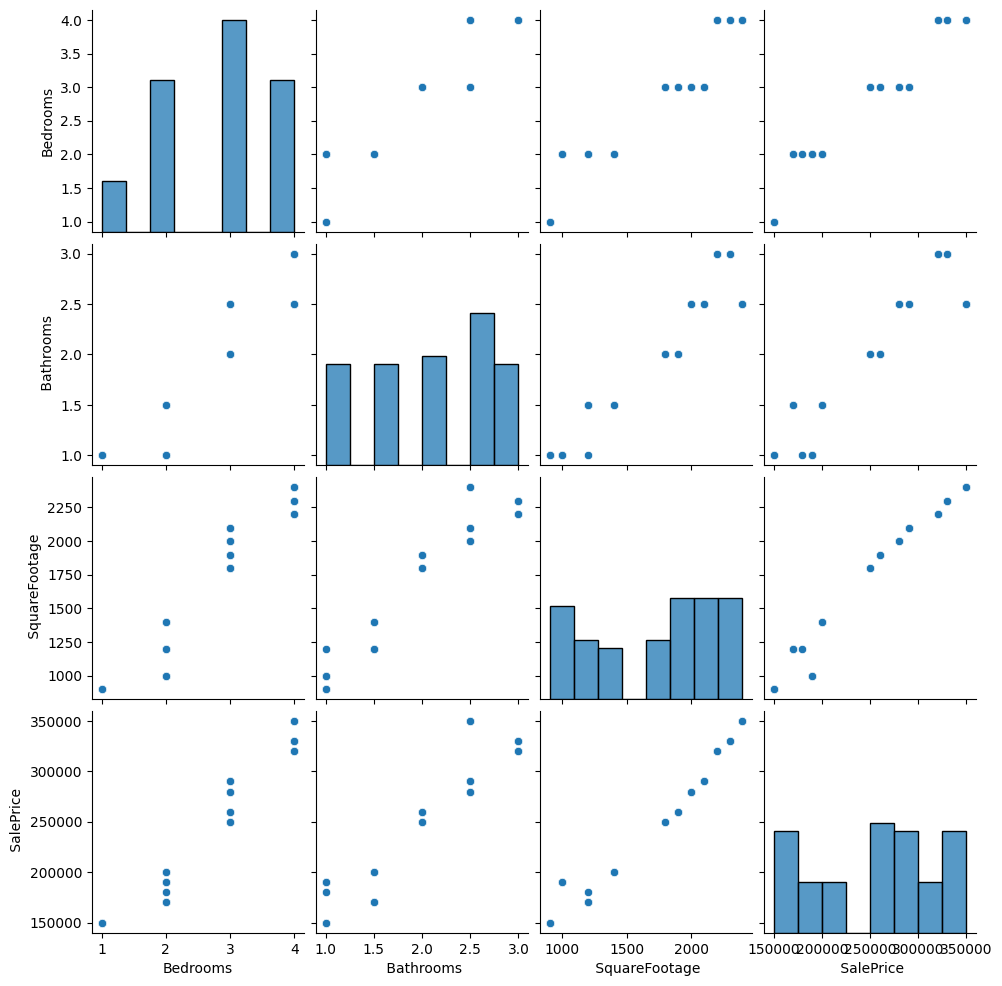

In [80]:
sns.pairplot(df)

<ipython-input-38-95c2e1ab3669>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")


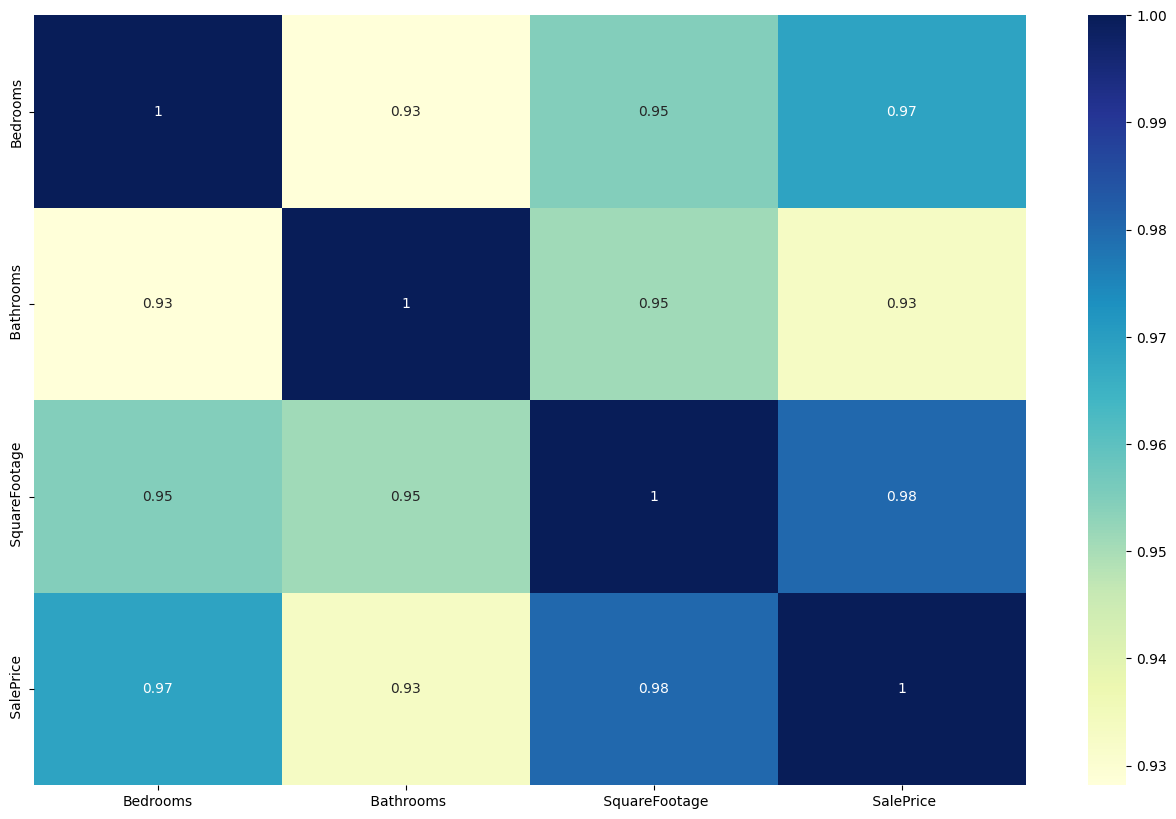

In [38]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<ipython-input-40-7a962291aad0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


<Axes: >

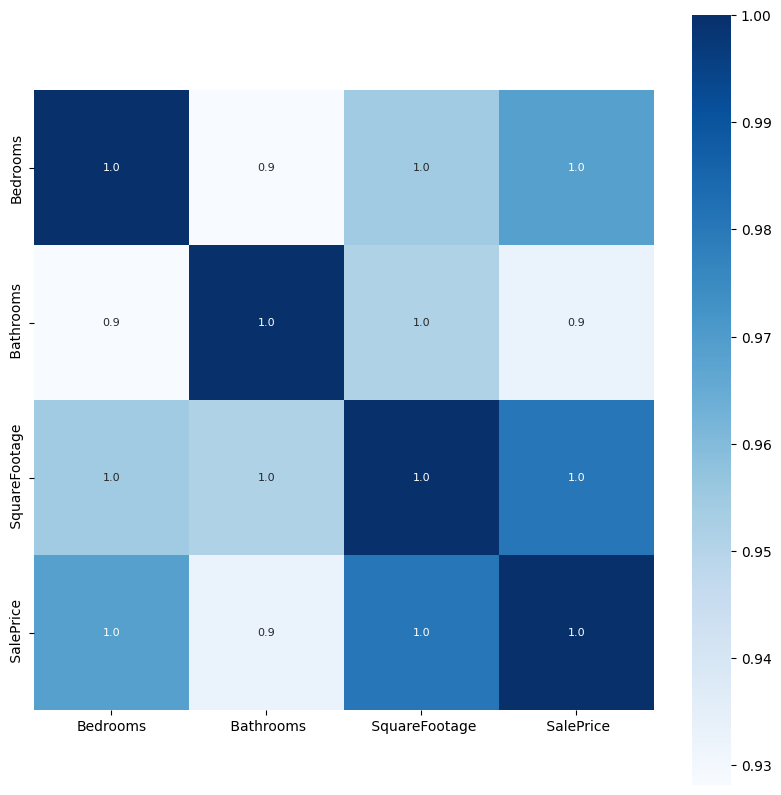

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Training a Linear Regression Model

X and y arrays

In [67]:
X = df[['Bedrooms', ' Bathrooms', ' SquareFootage',]]
y = df[' SalePrice']

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


# Creating and Training the Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [73]:
print(lm.intercept_)

47570.12134776762


In [74]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Bedrooms,28204.388008
Bathrooms,-7236.102864
SquareFootage,81.482057


# Predictions from our Model

In [75]:
predictions = lm.predict(X_test)

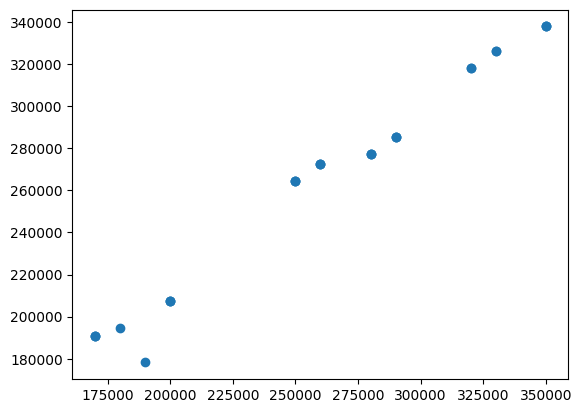

In [76]:
plt.scatter(y_test,predictions)

<ipython-input-77-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


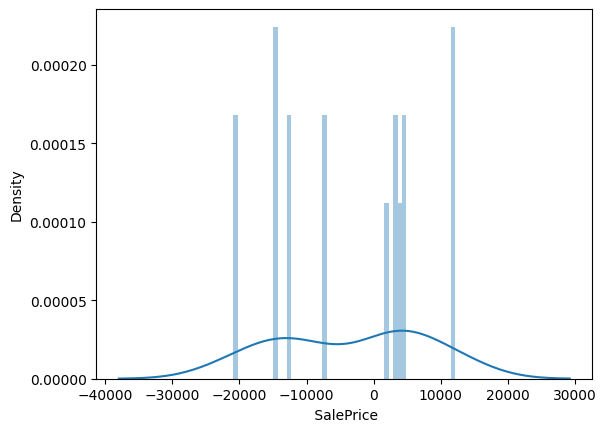

In [77]:
sns.distplot((y_test-predictions),bins=50);

# Regression Evaluation Metrics

In [78]:
from sklearn import metrics

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9737.619499552595
MSE: 129017541.6459306
RMSE: 11358.588893253009
